# Classifying responses by sentiment analysis

### Classifying the data

In [2]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

tqdm.pandas()
df = pd.read_csv('combined_cleaned_responses.csv')

classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', return_all_scores=True)

def get_sentiment_score(text):
    scores = classifier(str(text), truncation=True)[0]
    return scores

first_scores = get_sentiment_score(df.iloc[0, 1])
print("Sentiment scores for first comment:")
print(first_scores)

Device set to use cpu


Sentiment scores for first comment:
[{'label': 'NEGATIVE', 'score': 0.9981791973114014}, {'label': 'POSITIVE', 'score': 0.0018208258552476764}]


c:\Users\matth\anaconda3\envs\sa-env\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm
tqdm.pandas()
df = pd.read_csv('combined_cleaned_responses.csv')

classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', return_all_scores=True)

def get_sentiment_score(text):
    scores = classifier(str(text), truncation=True)[0]
    print(scores)
    pos = next(score['score'] for score in scores if score['label'] == 'POSITIVE')
    neg = next(score['score'] for score in scores if score['label'] == 'NEGATIVE')
    return pos - neg

df['Sentiment'] = df.iloc[:, 1].progress_apply(get_sentiment_score)
df.head()

c:\Users\matth\anaconda3\envs\sa-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

### Plotting it

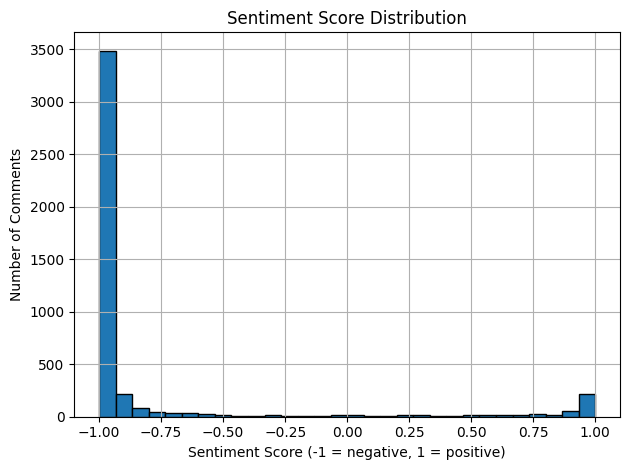

In [4]:
import matplotlib.pyplot as plt

plt.hist(df['Sentiment'], bins=30, edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score (-1 = negative, 1 = positive)')
plt.ylabel('Number of Comments')
plt.grid(True)
plt.tight_layout()
plt.savefig('results/sentiment_distribution.png', dpi=300)
plt.show()

